# 課題2：住宅価格の回帰モデルの作成

本課題では課題1と同じデータを用いてデータ分析の流れを確認します。各セルに入っているコメントの下に、実行するコードを記入してください。わからない場合は、ここまでのレッスン内容や各種ライブラリの公式ドキュメントを参照しましょう。

## 1. 必要なライブラリの読み込み

In [1]:
# 必要なライブラリの読み込み（変更しないでください）
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 2. データの読み込み

CSVファイル *iowa_ames_housing_price.csv* を読み込み、内容を確認します。

In [ ]:
# データを変数datasetに読み込む
dataset = pd.read_csv('./iowa_ames_housing_price.csv')

In [3]:
# データの最初の5行を表示
dataset.head()

,Order,area,price,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,1710,208500,60,RL,65.0,8450,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,1262,181500,20,RL,80.0,9600,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,1786,223500,60,RL,68.0,11250,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,1717,140000,70,RL,60.0,9550,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,2198,250000,60,RL,84.0,14260,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## 3. 目的変数と説明変数の選択

ここでは、以下の列を使用します。

- 目的変数： `price`
- 説明変数： `OverallQual`, `area`, `X2ndFlrSF`, `BsmtFinSF1`,  `OverallCond`

In [4]:
# 目的変数の列名（変更しないでください）
target_col = 'price'

# 説明変数の列名（変更しないでください）
feature_cols = ['OverallQual', 'area', 'X2ndFlrSF', 'BsmtFinSF1', 'OverallCond']

In [11]:
# target_col と feature_cols を使用して dataset より目的変数と説明変数に該当する列を取得し、
# numpy 配列に変換したものを変数 Y と X に格納する

# Y:目的変数に該当する列
Y = np.array(dataset[target_col])
print("Y=", Y)
print(f"Y.shape=" , Y.shape)

# X:説明変数に該当する列
X = np.array(dataset[feature_cols])
print("X=", X)
print("X.shape=" , X.shape)

Y= [208500 181500 223500 ... 266500 142125 147500]
Y.shape= (1460,)
X= [[   7 1710  854  706    5]
 [   6 1262    0  978    8]
 [   7 1786  866  486    5]
 ...
 [   7 2340 1152  275    9]
 [   5 1078    0   49    6]
 [   5 1256    0  830    6]]
X.shape= (1460, 5)


## 4. データの分割

この課題では、ホールドアウト法でデータを分割します。

In [39]:
# X と Y を 機械学習用データとテストデータに7:3で分ける(X_train, X_test, Y_train, Y_test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print("Y_test=", Y_test)
print("Y_test.shape=", Y_test.shape)
print("X_test=", X_test)
print("X_test.shape=", X_test.shape)

# 最小値
print("Y_test最小値", np.min(Y_test))
# 最大値
print("Y_test最大値", np.max(Y_test))

Y_test= [200624 133000 110000 192000  88000  85000 282922 141000 745000 148800
 208900 136905 225000 123000 119200 145000 190000 123600 149350 155000
 166000 144500 110000 174000 185000 168000 177500  84500 320000 118500
 110000 213000 156000 250000 372500 175000 277500 112500 263000 325000
 243000 130000 164990 280000 403000 119000 125000 128200 172500  84900
 412500 156000 167900 100000 275000 123000 132000 239900 139000 115000
 137500 135000 134450 180500 193500 156500 132000 224500 139000 225000
 188500 118000  82000 392000 112000 248900 134500  79500 320000 158000
 140000 136500 107500 145000 200500 185000 105000 202665 186000 136000
 200500 190000 187500 200000 172500 157000 213000 185000 124500 162900
 260000 198500 120000 159500 105900 260000 143000 106500 178900 127000
  90350 118500 190000 119900 183900 155000 386250 133000 193500 270000
 141000 146000 128500 176000 214000 222000 415298 187750 199900 180000
 206300 194000 142953 182900 116050 213250 139500 179000 107900 17590

In [43]:
# 機械学習用データを、学習データと検証データに7:3で分ける(X_train, X_valid, Y_train, Y_valid)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)
# Y_train
## 最小値
print("Y_train最小値", np.min(Y_train))
## 最大値
print("Y_train最大値", np.max(Y_train))
print("Y_train=", Y_train)
print("Y_train.shape=", Y_train.shape)

# Y_valid
## 最小値
print("Y_valid最小値", np.min(Y_valid))
## 最大値
print("Y_valin最大値", np.max(Y_valid))
print("Y_valid=", Y_valid)
print("Y_valid.shape=", Y_valid.shape)

print("--------------------ここから　X　-------------------------------------------------------------------")
print("X_train=", X_train)
print("X_train.shape=", X_train.shape)
print("X_valid=", X_valid)
print("X_valid.shape=", X_valid.shape)

Y_train最小値 52000
Y_train最大値 485000
Y_train= [135000  79000  84000 127000 216000 224000 175000 145000  88000 230000
 235128 176000 180000  81000 167000 138500 238000 135000 107000 136500
 131000 266000 132000 100000 266500 140000 167900 175500 179900 204000
 262000 109000 131400 149900 145000 290000 134432 122000 426000 121500
 230000 155000 191000 274900 293077 240000 274000 140000 437154 119500
 302000 136900 125000 271900 139000 311872 185000 147000 193000 225000
 109900 214500 155000 157500 209500 126000 159950 170000 143000 115000
 222000 177500 181134 341000 143500 159000 122500 128900 232600 348000
 190000 253000 180000 183500 219500 172785 194500 271000  85500 169500
 103200 309000 206900 197900 236500  78000  79000 138800 139400 170000
 159000 265900 215000 130000 392500 132000 149000 197500 205000 175000
 109000 195000 281213 170000 127000 157900 130500  98600 137500 236000
 167000 148000 214000 359100 215000 212900 121600 141000 145250 144000
 230000 260000 135000 190000 3125

## 5. モデルの作成から評価まで

線形回帰モデルと、回帰木、ランダムフォレストの3つのモデルを作成して比較します。それぞれのモデルで以下を行います。
- モデルの作成
- 学習データによる学習
- 検証データによる予測
- MSEの算出

In [17]:
# 線形回帰モデルを作成し、学習・予測を実施して、MSEを算出する
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train) # 学習
Y_pred = linear_model.predict(X_valid) # 予測

# 正解（検証データの目的変数）と予測値との比較
print(Y_valid[:5])
print(Y_pred[:5])

linear_model_mse = mean_squared_error(Y_valid, Y_pred) # MSE算出
print('MSE(線形回帰):', linear_model_mse)

[148500 135000 125000 129000 140000]
[130384.51891686 160157.30599718 120965.98169247 106234.62154535
 181862.43025951]
MSE(線形回帰): 1025944027.7910818


In [18]:
# 回帰木のモデルを作成し、学習・予測を実施して、MSEを算出する
decisiontree_model = DecisionTreeRegressor(random_state=0)
decisiontree_model.fit(X_train, Y_train) # 学習
Y_pred = decisiontree_model.predict(X_valid) # 予測

# 正解（検証データの目的変数）と予測値との比較
print(Y_valid[:5])
print(Y_pred[:5])

decisiontree_model_mse = mean_squared_error(Y_valid, Y_pred) # MSE算出
print('MSE(回帰木):', decisiontree_model_mse)

[148500 135000 125000 129000 140000]
[120000. 172000. 123000. 135500. 159000.]
MSE(回帰木): 1381288719.2139535


In [47]:
# ランダムフォレストのモデルを作成し、学習・予測を実施して、MSEを算出する
randomforest_model = RandomForestRegressor(random_state=0)
randomforest_model.fit(X_train, Y_train) # 学習
Y_pred = randomforest_model.predict(X_valid) # 予測

# 正解（検証データの目的変数）と予測値との比較
print(Y_valid[:5])
print(Y_pred[:5])

randomforest_model_mse = mean_squared_error(Y_valid, Y_pred) # MSE算出
print('MSE(ランダムフォレスト):', randomforest_model_mse)

[120000 143000 157000 203000 219500]
[156459.5  178665.54 217786.   206071.6  224279.  ]
MSE(ランダムフォレスト): 939817264.3267125


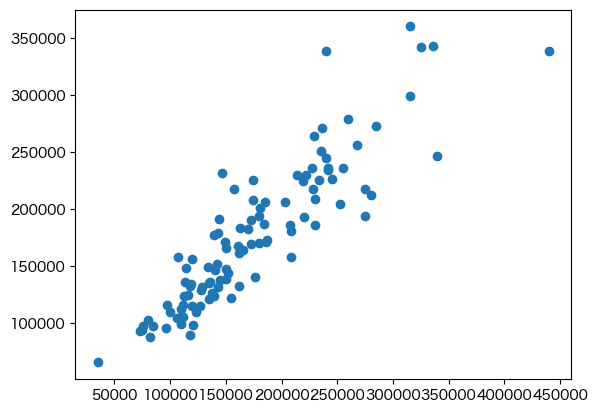

In [ ]:
# Y_valid　X軸:正解の値、Y軸:予測値で散布図を作成
plt.scatter(Y_valid, Y_pred)

## 6. テストデータによる汎化性能の確認

3つの中でもっともMSEの値が良かったモデルについて、テストデータで汎化性能を確認しましょう。

In [21]:
# 3つのモデルのMSEを、桁をあわせてまとめて表示する
print('MSE(線形回帰)　　　　　　:', linear_model_mse)
print('MSE(回帰木)　　　　　　　:', decisiontree_model_mse)
print('MSE(ランダムフォレスト)　:', randomforest_model_mse)

MSE(線形回帰)　　　　　　: 1025944027.7910818
MSE(回帰木)　　　　　　　: 1381288719.2139535
MSE(ランダムフォレスト)　: 758213811.2845956


In [36]:
# テストデータを使って予測を行いMSEを算出
# MSEの値が良かったモデル = ランダムフォレストを使って予測を行う
Y_test_pred = randomforest_model.predict(X_test)

# 正解（検証データの目的変数）と予測値との比較
print(Y_test[:5])
print(Y_test_pred[:5])

# MSE(ランダムフォレスト_テストデータ(Y_test))の値が、 1416089058.994951 で、以下のいずれよりも悪い値になった。
"""
MSE(線形回帰)　　　　　　: 1025944027.7910818
MSE(回帰木)　　　　　　　: 1381288719.2139535
MSE(ランダムフォレスト)　: 758213811.2845956
"""
randomforest_model_test_mse = mean_squared_error(Y_test, Y_test_pred) # MSE算出
print('MSE(ランダムフォレスト_テストデータ(Y_test)):', randomforest_model_test_mse) 


[200624 133000 110000 192000  88000]
[190289.4   155365.24  114540.005 244259.94   88488.   ]
MSE(ランダムフォレスト_テストデータ(Y_test)): 1416089058.994951


## 7. グラフによる確認

説明変数が多い場合、「説明変数で目的変数を正しく予測できているか」を可視化することは困難です。そこで「正解と予測値」とを比較することで、予測の精度を可視化してみましょう。

### 散布図による可視化

X軸(横方向)に `テストデータの正解の値` 、Y軸(縦方向)に `予測値` を使って散布図を作成してみましょう。全体的に右肩上がりで、直線上にデータが並んでいれば、予測が行なえていると判断できます。

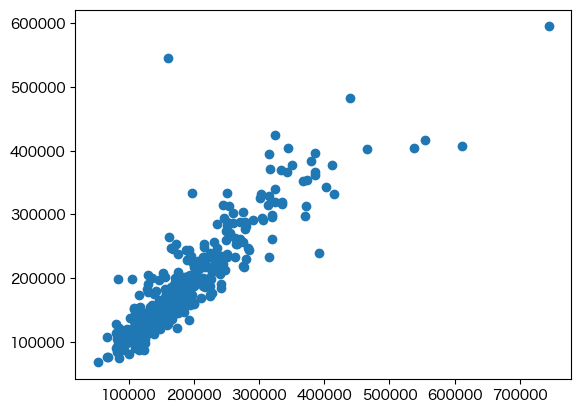

In [49]:
# Y_test　X軸:正解の値、Y軸:予測値で散布図を作成
plt.scatter(Y_test, Y_test_pred)          

### ヒストグラムによる可視化

「誤差率＝正解の値と予測値との差の割合」をヒストグラムで確認してみましょう。誤差率は以下で計算できます。

`（正解の値－予測値）/ 正解の値`

併せて、誤差率の平均値、標準偏差も出力しましょう。平均値は `numpy` の `mean` 関数、標準偏差は `std` 関数で取得できます。

なお、ヒストグラムを描く際は`matplotlib.pyplot`の`hist`関数が使えます。matplotlib.pyplotはpltという名前をつけているはずなので、ヒストグラム化したいデータを`plt.hist()`の引数に渡すことでヒストグラムを描画できます。

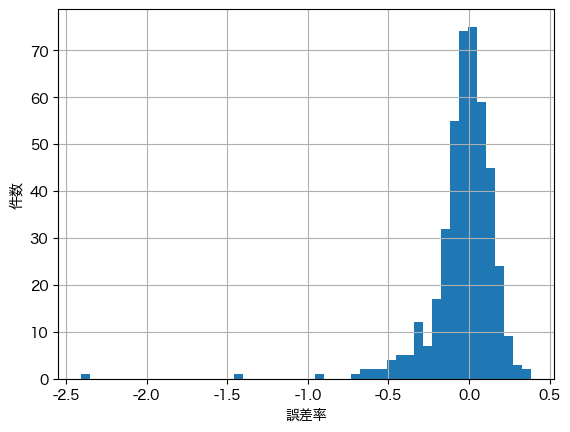

最小値 52500
最大値 745000
平均値 181702.78538812784
中央値 163700.0
標準偏差 82395.3362816311


In [37]:
# 実際の成約価格と予測価格の誤差率をヒストグラムで表示
# --- 日本語フォント対策（環境にある候補を優先的に使う） ---
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = [
    'IPAexGothic',        # Linux系でよく使う
    'Noto Sans CJK JP',   # Google Noto
    'Yu Gothic',          # Windows
    'Hiragino Sans',      # macOS
    'Meiryo', 'MS Gothic' # Windows
]
plt.rcParams['axes.unicode_minus'] = False  # マイナス記号の文字化け対策

plt.figure()
plt.hist((Y_test - Y_test_pred) / Y_test, bins=50)
plt.xlabel("誤差率")
plt.ylabel("件数")
plt.grid()
plt.show()


# 最小値
print("最小値", np.min(Y_test))
# 最大値
print("最大値", np.max(Y_test))

# 平均値
print("平均値", np.mean(Y_test))
# 中央値
print("中央値", np.median(Y_test))

# 標準偏差
print("標準偏差",np.std(Y_test))